In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# Write and wrangle transcript quants and protein abundances

In [3]:
metadata = pd.read_excel('inputs/table_s1_meta_data.xlsx', sheet_name=1)
table_s2d = pd.read_excel('inputs/table_s2d_transcriptomic.xlsx', skiprows=2)
table_s3a = pd.read_excel('inputs/table_s3a_proteomic.xlsx', skiprows=2)

In [4]:
quants = (
    table_s2d
        .rename({'id.1': 'transcript_name'}, axis=1)
        .pipe(lambda df: df[df['id'].map(lambda s: type(s) == str)])  # MAR/OCT/SEPT/DEC filter bc Excel
        .pipe(lambda df: df[df['data type'] == 'transcriptomic data'])
        .melt(id_vars=[
                'id', 'data type', 'gene_id', 
                'geneSymbol', 'gene_type', 'length', 
                'transcript_name'
        ], 
              var_name='sample', 
              value_name='log2rpkm'
        )  # turn into a tidy dataframe
)

abundances = (
    table_s3a
        .rename({'id.1': 'protein_name'}, axis=1)
        .pipe(lambda df: df[df['id'].map(lambda s: type(s) == str)])  # MAR/OCT/SEPT/DEC filter bc Excel; not working here, not sure why, debug later
        .pipe(lambda df: df[df['data type'] == 'proteomic data'])
        .melt(id_vars=[
            'id', 'data type', 'id.description', 
            'geneSymbol', 'numColumnsProteinObserved', 
            'numSpectraProteinObserved', 'protein_mw', 
            'percentCoverage', 'numPepsUnique', 
            'scoreUnique', 'species', 'orfCategory', 
            'accession_number', 'accession_numbers', 'subgroupNum', 
            'entry_name', 'GeneSymbol', 'protein_name'
        ], 
              var_name='sample', 
              value_name='log2abundance'
        )  # turn into a tidy dataframe

)

In [5]:
abundances_sq = (
    abundances
        .pivot_table(
            index='sample',
            columns='geneSymbol',
            values='log2abundance'
        )
)

In [6]:
quants_sq = (
    quants
        .pivot_table(
            index='sample',
            columns='geneSymbol',
            values='log2rpkm'
        )
)

In [7]:
quants_sq.head()
abundances_sq.head()

geneSymbol,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
sample,,,,,,,,,,,,,,,,,,,,,
C3L.00001,2.2545,-2.7845,8.0488,-3.6051,-1.3305,0.8208,-1.0519,3.4780,2.6953,-3.3578,...,1.5053,2.0838,1.9289,2.1042,3.5256,2.4670,4.6299,3.8840,3.3197,4.1800
C3L.00001.N,1.7215,-4.2155,11.0008,-3.7560,-1.6334,2.4520,-0.0101,3.7973,2.6396,0.3493,...,1.5673,1.6925,1.6281,1.7682,3.6732,-1.7160,3.7197,4.2188,3.9881,4.2433
C3L.00009,1.4770,-1.9278,8.9855,0.4851,-2.4401,1.7417,-1.5157,4.1043,2.8091,0.0472,...,2.5437,3.2720,1.2569,1.9248,3.0739,0.4493,3.5318,4.5534,3.1330,4.8156
C3L.00009.N,1.9000,-4.9290,9.9844,-3.2591,-4.1689,1.7723,0.4316,3.9035,2.7980,1.5520,...,1.2365,1.8852,1.4783,1.5831,3.8165,-1.9746,3.9841,4.6984,4.1366,4.4500
C3L.00080,1.5103,-4.9913,7.4303,-4.3766,-2.1868,-0.3121,-2.3936,4.6577,3.0394,1.2233,...,2.8300,3.9594,1.3346,2.2292,3.9886,-0.7604,3.5882,3.4509,5.3047,4.2428


geneSymbol,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-09-01 00:00:00,2020-09-02 00:00:00,2020-09-03 00:00:00,2020-09-05 00:00:00,2020-09-06 00:00:00,...,ZSCAN31,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
sample,,,,,,,,,,,,,,,,,,,,,
C3L.00001,-3.6392,-3.7781,-2.2065,0.5296,-0.6980,-1.9288,0.9052,0.2046,1.6815,-0.7201,...,NaN,NaN,0.2992,-1.3607,NaN,NaN,0.6527,-0.9694,-1.1840,-2.5284
C3L.00001.N,-1.5546,-0.5679,2.0723,-0.9665,-0.3706,1.4014,1.8434,0.7857,1.2159,0.8094,...,NaN,NaN,-0.0312,-1.9098,NaN,NaN,0.1267,1.3580,0.3871,0.9988
C3L.00009,-4.1788,-0.7705,0.0268,NaN,1.3190,-2.1951,0.8240,0.6389,1.5533,-1.4960,...,11.6158,-0.5098,-0.1622,0.9828,0.5633,-1.4620,-1.0690,0.7674,0.5066,0.4311
C3L.00009.N,-1.3633,0.8891,-0.4241,NaN,-0.4400,2.7794,0.8652,1.2035,-0.3445,1.4821,...,20.0028,0.2126,0.1290,-2.3860,-3.3769,-1.1245,-0.0142,0.8374,1.3627,-0.2808
C3L.00080,-0.4923,-1.3747,-0.6050,-0.1815,-0.5611,-0.7781,-0.9763,-1.0702,-0.5862,-0.7927,...,NaN,NaN,-0.2795,0.6613,NaN,0.9659,-0.3442,-1.6480,1.2872,-0.7301


In [51]:
def plot_genes_heatmap(quants_sq, abundances_sq, samples, genes, robust=False, title=None, saveas=None):
    quants_df = quants_sq.loc[quants_sq.index.isin(samples), quants_sq.columns.isin(genes)]
    abundances_df = abundances_sq.loc[abundances_sq.index.isin(samples), abundances_sq.columns.isin(genes)]
    
    with sns.plotting_context('paper', font_scale=0.7):
        fig, axes = plt.subplots(nrows=2, figsize=(10, 10))
        _ = sns.heatmap(
            data=quants_df,
            cmap='Spectral_r',
            square=True,
            ax=axes[0],
            robust=robust,
            annot=True,
            annot_kws={'fontsize': 'xx-small'}            
        )
        _ = axes[0].set_title('Transcripts')
        _ = sns.heatmap(
            data=abundances_df,
            cmap='Spectral_r',
            square=True,
            ax=axes[1],
            robust=robust,
            annot=True,
            annot_kws={'fontsize': 'xx-small'}
        )
        _ = axes[1].set_title('Proteins')
        
        if title:
            _ = plt.suptitle(title)
        
    plt.tight_layout()
    
    if saveas:
        fig.savefig(saveas)
        
    return fig, axes



# ALK+ patients

ALK+ lung adenocarcinomas are young non-smokers who develop cancer

In [52]:
ALK_participants = metadata[metadata['Putative.driver.mutation'] == 'ALK-Fusion']['Participant']
ALK_samples = metadata[metadata['Participant'].isin(ALK_participants)]['Sample.ID']

## Lung marker genes from PMC4932457 S2.

Seems like a reasonable sanity check

n.b., I know the problem said to not use external data--but I have never looked at a dataset like this before. If this were a microbial metabolic engineering dataset, I would immediately have a set of "sanity check" genes, e.g., genes involved in glycolysis, citric acid cycle, most likely fatty-acid biosynthesis, etc. I think I am still within the spirit of the rules.

(<Figure size 1000x1000 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Transcripts'}, xlabel='geneSymbol', ylabel='sample'>,
        <AxesSubplot:title={'center':'Proteins'}, xlabel='geneSymbol', ylabel='sample'>],
       dtype=object))

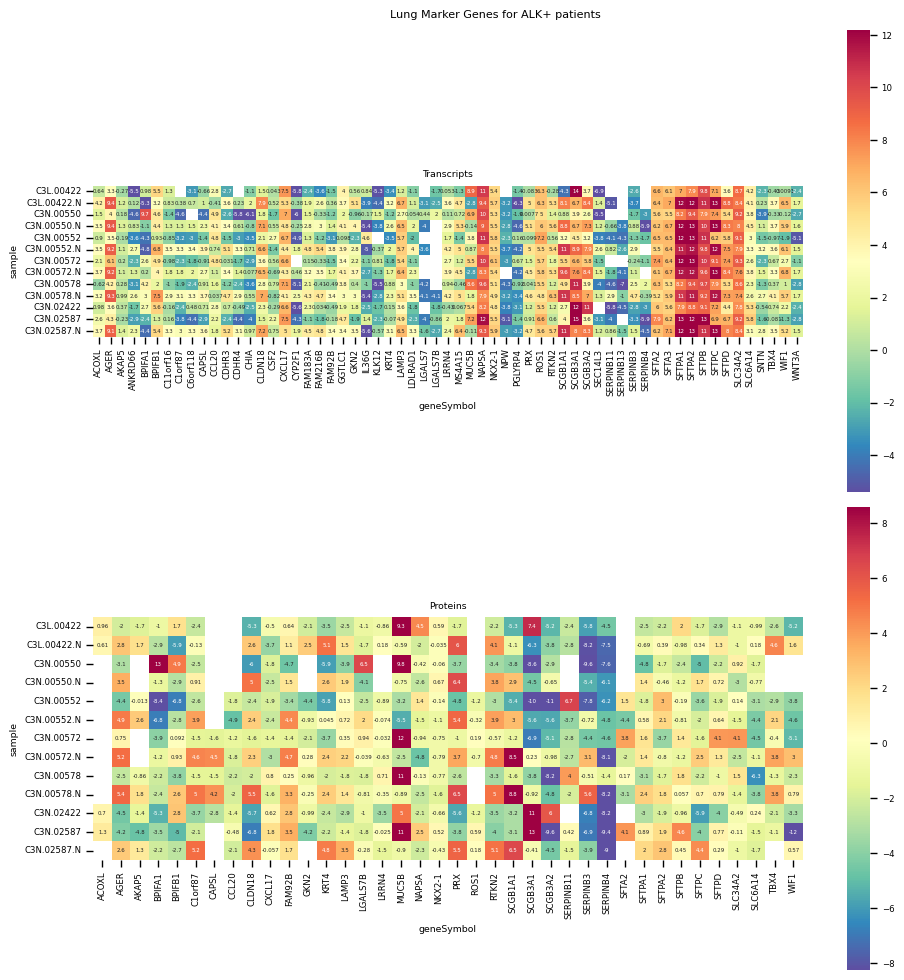

In [53]:
lung_marker_genes = [l.strip() for l in open('lung_genes.txt').readlines()]

plot_genes_heatmap(
    abundances_sq=abundances_sq,
    quants_sq=quants_sq,
    samples=ALK_samples,
    genes=lung_marker_genes,
    title='Lung Marker Genes for ALK+ patients',
    saveas='ALKfusions_lung_marker_genes.png',
    robust=True
)

## Proteins that interact with ALK from STRINGdb

(<Figure size 1000x1000 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Transcripts'}, xlabel='geneSymbol', ylabel='sample'>,
        <AxesSubplot:title={'center':'Proteins'}, xlabel='geneSymbol', ylabel='sample'>],
       dtype=object))

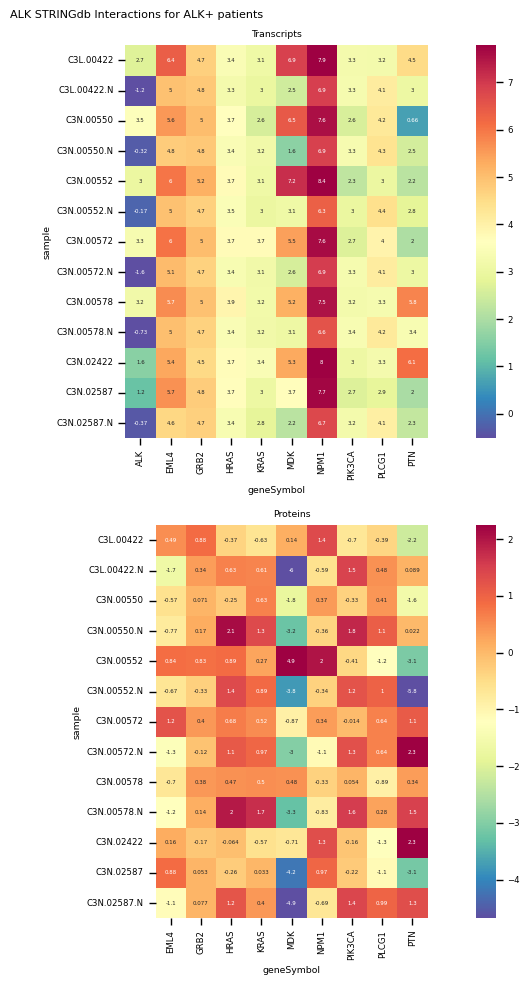

In [54]:
ALK_string_genes = [
    'PTN',
    'NPM1',
    'KRAS',
    'EML4',
    'HRAS',
    'ALK',
    'PIK3CA',
    'MDK',
    'GRB2',
    'PLCG1'
]

plot_genes_heatmap(
    abundances_sq=abundances_sq,
    quants_sq=quants_sq,
    samples=ALK_samples,
    genes=ALK_string_genes,
    title='ALK STRINGdb Interactions for ALK+ patients',
    saveas='ALKfusions_ALK_STRINGdb_interactions.png',
    robust=True
)


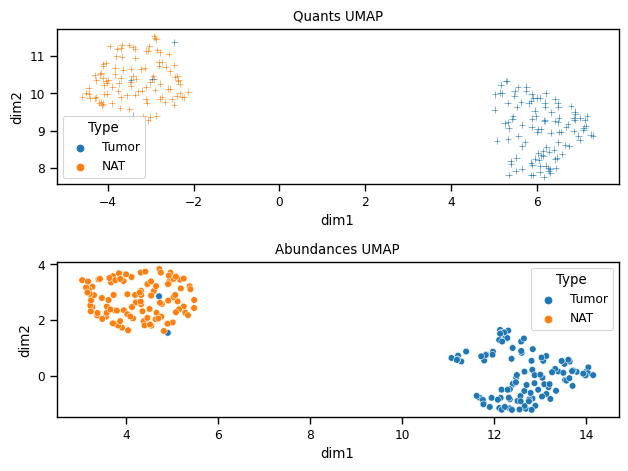

In [140]:
from umap import UMAP


with sns.plotting_context('paper'):
    fig, axes = plt.subplots(nrows=2)
    
    clusterable_embedding = UMAP(
        n_neighbors=32,
        min_dist=0.0,
        n_components=2,
        random_state=32,
    ).fit_transform(quants_sq.replace(np.nan, 0))


    umap_df = pd.DataFrame(
        clusterable_embedding, 
        columns=['dim1', 'dim2'],
        index=quants_sq.index
    )
    umap_df = umap_df.merge(metadata, left_index=True, right_on='Sample.ID', how='right')
    
    _ = sns.scatterplot(umap_df, x='dim1', y='dim2', hue='Type', ax=axes[1])
    _ = axes[0].set_title('Quants UMAP')

    clusterable_embedding = UMAP(
        n_neighbors=32,
        min_dist=0.0,
        n_components=2,
        random_state=32,
    ).fit_transform(abundances_sq.replace(np.nan, 0))


    umap_df = pd.DataFrame(
        clusterable_embedding, 
        columns=['dim1', 'dim2'], 
        index=abundances_sq.index
    ).merge(metadata, left_index=True, right_on='Sample.ID', how='right')
    
    _ = sns.scatterplot(umap_df, x='dim1', y='dim2', marker='+', hue='Type', c='r', ax=axes[0])
    _ = axes[1].set_title('Abundances UMAP')
    # _ = plt.savefig('abundances_umap.png')
    
    _ = plt.tight_layout()
    _ = plt.savefig('multiomic_umap.png')

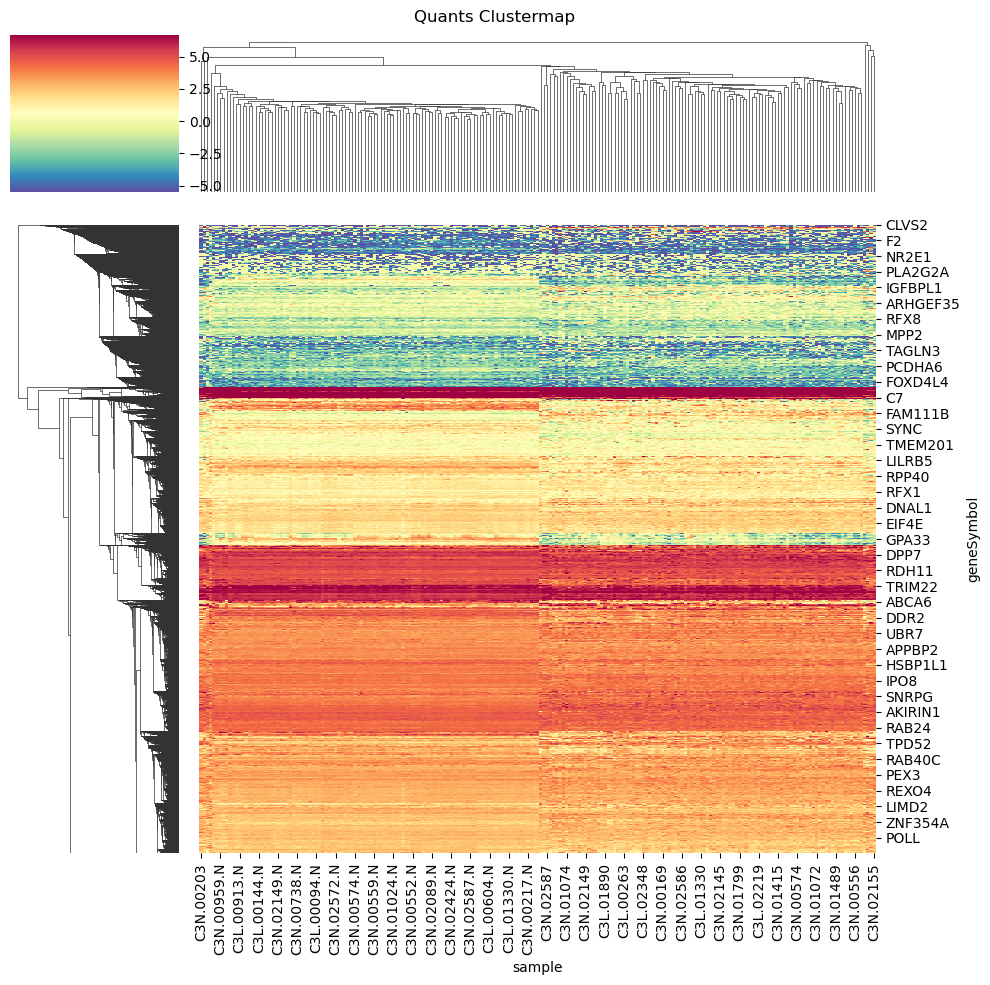

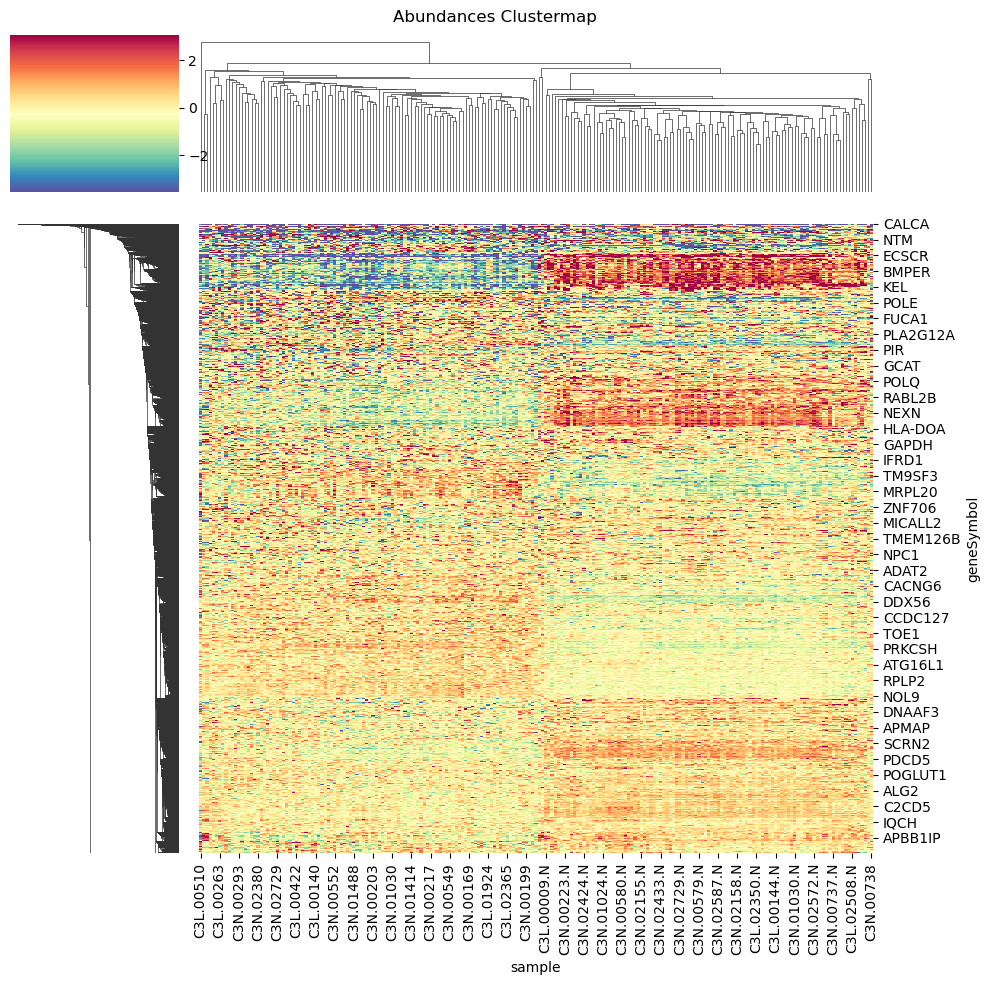

In [40]:
quants_clustermap = sns.clustermap(quants_sq.replace(np.nan, 0).T, cmap='Spectral_r', robust=True)
_ = quants_clustermap.fig.suptitle('Quants Clustermap')
_ = plt.tight_layout()
_ = quants_clustermap.savefig('quants_clustermap.png')

abundances_clustermap = sns.clustermap(abundances_sq.replace(np.nan, 0).T, cmap='Spectral_r', robust=True)  # I think robust=True makes this more legible?
_ = abundances_clustermap.fig.suptitle('Abundances Clustermap')
_ = plt.tight_layout()
_ = abundances_clustermap.savefig('abundances_clustermap.png')


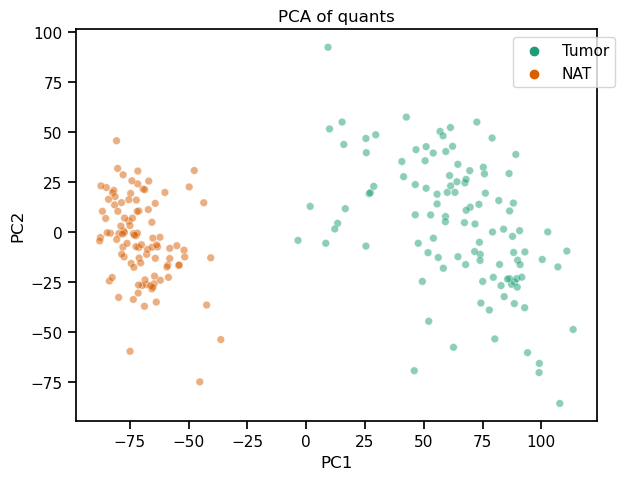

In [122]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
quants_pca_df = pd.DataFrame(
    pca.fit_transform(quants_sq.replace(np.nan, 0)), 
    columns=['PC1', 'PC2'], 
    index=quants_sq.index
)

with sns.plotting_context('notebook'):
    g = sns.scatterplot(
        data=quants_pca_df.merge(metadata, left_index=True, right_on='Sample.ID', how='right'),
        x='PC1',
        y='PC2',
        # row='organ',
        # col_wraxp=2,
        # col='strain',
        hue='Type',
        s=30,
        alpha=0.5,
        palette='Dark2'
    )
    _ = plt.legend(bbox_to_anchor=(1.05, 1))
    _ = plt.tight_layout()
    _ = plt.title('PCA of quants')
    plt.savefig('plots/quants_pca.png')

/Users/aru/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['datetime', 'str']. An error will be raised in 1.2.
  warnings.warn(


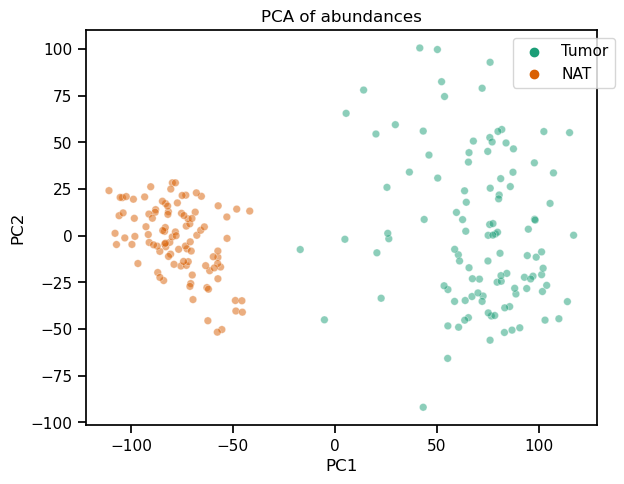

In [119]:
abundances_pca_df = pd.DataFrame(
    pca.fit_transform(abundances_sq.replace(np.nan, 0)), 
    columns=['PC1', 'PC2'], 
    index=quants_sq.index
)

with sns.plotting_context('notebook'):
    g = sns.scatterplot(
        data=abundances_pca_df.merge(metadata, left_index=True, right_on='Sample.ID', how='right'),
        x='PC1',
        y='PC2',
        hue='Type',
        # row='organ',
        # col_wraxp=2,
        # col='strain',
        s=30,
        alpha=0.5,
        palette='Dark2'
    )
    _ = plt.legend(bbox_to_anchor=(1.05, 1))
    _ = plt.tight_layout()
    _ = plt.title('PCA of abundances')
    plt.savefig('plots/abundance_pca.png')

In [110]:
abundances_pca_df

,PC1,PC2
sample,,
C3L.00001,97.873281,39.069291
C3L.00001.N,-59.671109,-11.232638
C3L.00009,55.426158,-48.278217
C3L.00009.N,-41.784905,13.233846
C3L.00080,79.804594,1.892297
...,...,...
C3N.02729.N,-98.131482,-0.329621
X11LU013,94.396990,-10.614549
X11LU016,102.165889,-17.392254


In [111]:
abundances_pca_df.merge(metadata, left_index=True, right_on='Sample.ID')

,PC1,PC2,Sample.ID,Participant,Experiment,Channel,Type,Aliquot,Smoking.Status,Stage,...,Number.somatic.mutations,Mutation.Signature.Activity.W1.COSMIC5,Mutation.Signature.Activity.W2.COSMIC4,Mutation.Signature.Activity.W3.COSMIC2,ALK.fusion,ROS1.fusion,RET.fusion,Putative.driver.mutation,Methylation.QC,Dominant.Histological.Subtype
114,97.873281,39.069291,C3L.00001,C3L-00001,13,129C,Tumor,CPT0001580009,non-smoker,2A,...,47.0,27.444708,13.741036,9.382369e+00,0,0,0,EGFR-AMP,pass,acinar
115,-59.671109,-11.232638,C3L.00001.N,C3L-00001,13,130N,NAT,CPT0001590003,non-smoker,NaN,...,283.0,NaN,NaN,NaN,0,0,0,NaN,pass,NaN
162,55.426158,-48.278217,C3L.00009,C3L-00009,19,126,Tumor,CPT0001380003,smoker,1A,...,263.0,74.674280,211.026631,1.400854e+01,0,0,0,NaN,pass,acinar
163,-41.784905,13.233846,C3L.00009.N,C3L-00009,19,127N,NAT,CPT0001390003,smoker,NaN,...,4.0,NaN,NaN,NaN,0,0,0,NaN,pass,NaN
180,79.804594,1.892297,C3L.00080,C3L-00080,21,126,Tumor,CPT0001060010,smoker,1B,...,625.0,68.684268,646.452404,1.381015e+01,0,0,0,CDK4-AMP,pass,acinar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,-98.131482,-0.329621,C3N.02729.N,C3N-02729,2,127N,NAT,CPT0148300003,non-smoker,NaN,...,4.0,NaN,NaN,NaN,0,0,0,NaN,pass,NaN
53,94.396990,-10.614549,X11LU013,11LU013,6,130C,Tumor,CPT0053040004,non-smoker,3A,...,47.0,35.492286,9.276117,3.712497e+00,0,0,0,NaN,pass,acinar
80,102.165889,-17.392254,X11LU016,11LU016,9,130C,Tumor,CPT0052940004,non-smoker,3A,...,499.0,26.697709,536.827085,3.072185e-17,0,0,0,NaN,pass,acinar
89,70.923052,-23.216651,X11LU022,11LU022,10,130C,Tumor,CPT0052170004,non-smoker,1B,...,860.0,5.056205,986.228991,3.699536e-73,0,0,0,NaN,pass,acinar
